<a href="https://colab.research.google.com/github/gabrielmannarino/coc361_inteligencia_computacional/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 283 kB/s 


In [ ]:
# imports everything and mounts the drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
from google.colab import drive 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

warnings.filterwarnings('ignore')

drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [ ]:
# reads and previews the dataset
df=pd.read_csv('gdrive/MyDrive/flights_lite.csv')

df.head()

,month,dayofmonth,deptime,arrtime,depdelay,origin,dest,uniquecarrier,arrdelay
0,1,3,18.400000,23.050000,0.816667,LAS,HOU,WN,1
1,1,3,11.833333,16.733333,0.166667,LAS,HOU,WN,0
2,1,3,7.816667,12.450000,0.150000,LAS,HOU,WN,0
3,1,3,20.850000,1.566667,0.683333,LAS,HOU,WN,1
4,1,3,17.633333,18.633333,0.383333,LAS,LAX,WN,0


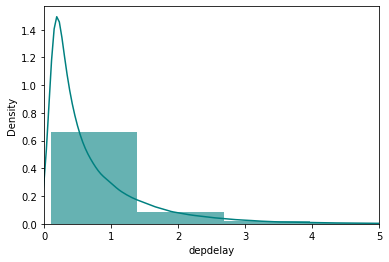

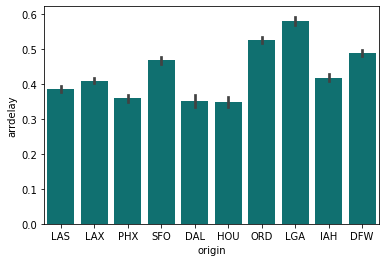

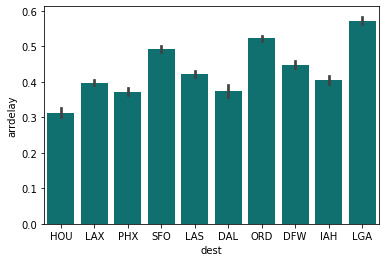

In [ ]:
# data visialization
ax = df["depdelay"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["depdelay"].plot(kind='density', color='teal')
ax.set(xlabel='depdelay')
plt.xlim(0,5)
plt.show()

sns.barplot('origin', 'arrdelay', data=df, color="teal")
plt.show()

sns.barplot('dest', 'arrdelay', data=df, color="teal")
plt.show()

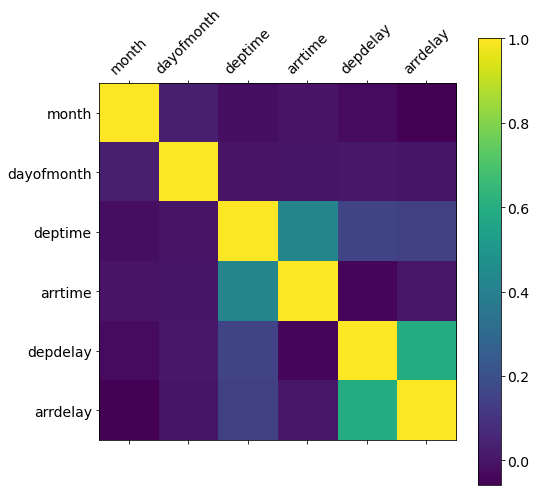

In [ ]:
f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


In [ ]:
# declares the target variable and splits the dataset
X = df.drop(['arrdelay'], axis=1)
y = df['arrdelay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# encodes remaining variables with one-hot encoding
categorical = [var for var in df.columns if df[var].dtype=='O']
encoder = ce.OneHotEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
cols = X_train.columns

# transforms the data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# debug: gets one column of the data set
#X = df['arrtime'].to_numpy().reshape(-1, 1)
#y = df['arrdelay']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
y_pred_gnb_train = gnb.predict(X_train)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gnb)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_gnb_train)))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0], '\nTrue Negatives(TN) = ', cm[1,1], '\nFalse Positives(FP) = ', cm[0,1], '\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.7999
Training-set accuracy score: 0.8014
Confusion matrix

 [[12402  3273]
 [ 2398 10266]]
True Positives(TP) =  12402 
True Negatives(TN) =  10266 
False Positives(FP) =  3273 
False Negatives(FN) =  2398


In [ ]:
# train a Logistic Regression classifier on the training set
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_lr_train)))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0], '\nTrue Negatives(TN) = ', cm[1,1], '\nFalse Positives(FP) = ', cm[0,1], '\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.8847
Training-set accuracy score: 0.8856
Confusion matrix

 [[14519  1156]
 [ 2112 10552]]
True Positives(TP) =  14519 
True Negatives(TN) =  10552 
False Positives(FP) =  1156 
False Negatives(FN) =  2112
